In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm  # Progress bar for iteration

In [2]:
# Define the folder containing the processed CSV files
input_folder = "processed_data"
WORDCLOUD_COLOR_MAP = 'tab10_r'  # Colormap for WordCloud

In [3]:
# Get the list of all CSV files in the folder
csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Display the found files
print("Found CSV files:", csv_files)

Found CSV files: ['Resume_processed_remove_numbers=False_use_dictionary=True_use_lemmatization=False_use_stemming=False.csv', 'Resume_processed_remove_numbers=True_use_dictionary=False_use_lemmatization=False_use_stemming=False.csv', 'Resume_processed_remove_numbers=True_use_dictionary=True_use_lemmatization=False_use_stemming=False.csv', 'Resume_processed_remove_numbers=True_use_dictionary=True_use_lemmatization=False_use_stemming=True.csv', 'Resume_processed_remove_numbers=True_use_dictionary=True_use_lemmatization=True_use_stemming=False.csv', 'Resume_processed_remove_numbers=True_use_dictionary=True_use_lemmatization=True_use_stemming=True.csv']


In [4]:
for file in csv_files:
    file_path = os.path.join(input_folder, file)
    
    # Load the dataset
    print(f"\nProcessing file: {file}")
    df = pd.read_csv(file_path)
    print("\nINFO")
    df.info()
    print("\nINDEX NULL")
    nan_indices = df[df['Resume_str'].isna()].index
    print(nan_indices)  # This will print the indices of the NaN values
    nan_rows = df[df['Resume_str'].isna()]  # Get the row(s) with NaN in 'Resume_str'
    print(nan_rows)  # This will print the entire row(s) where NaN exists


Processing file: Resume_processed_remove_numbers=False_use_dictionary=True_use_lemmatization=False_use_stemming=False.csv

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2483 non-null   int64 
 1   Resume_str  2483 non-null   object
 2   Category    2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB

INDEX NULL
Index([], dtype='int64')
Empty DataFrame
Columns: [ID, Resume_str, Category]
Index: []

Processing file: Resume_processed_remove_numbers=True_use_dictionary=False_use_lemmatization=False_use_stemming=False.csv

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2483 non-null   int64 
 1   Resume_str  2483 non-null   object
 2   Category    248

In [5]:
# Function to generate WordCloud
def generate_wordcloud(df):
    """
    Generates a WordCloud from the 'Resume_str' column of the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing resumes.
    
    Returns:
    - wordcloud (WordCloud): The generated WordCloud object.
    """
    txt = ' '.join(text for text in df['Resume_str'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)
    
    return wordcloud

Processing CSV Files:   0%|                                                                      | 0/6 [00:00<?, ?it/s]


Processing file: Resume_processed_remove_numbers=False_use_dictionary=True_use_lemmatization=False_use_stemming=False.csv


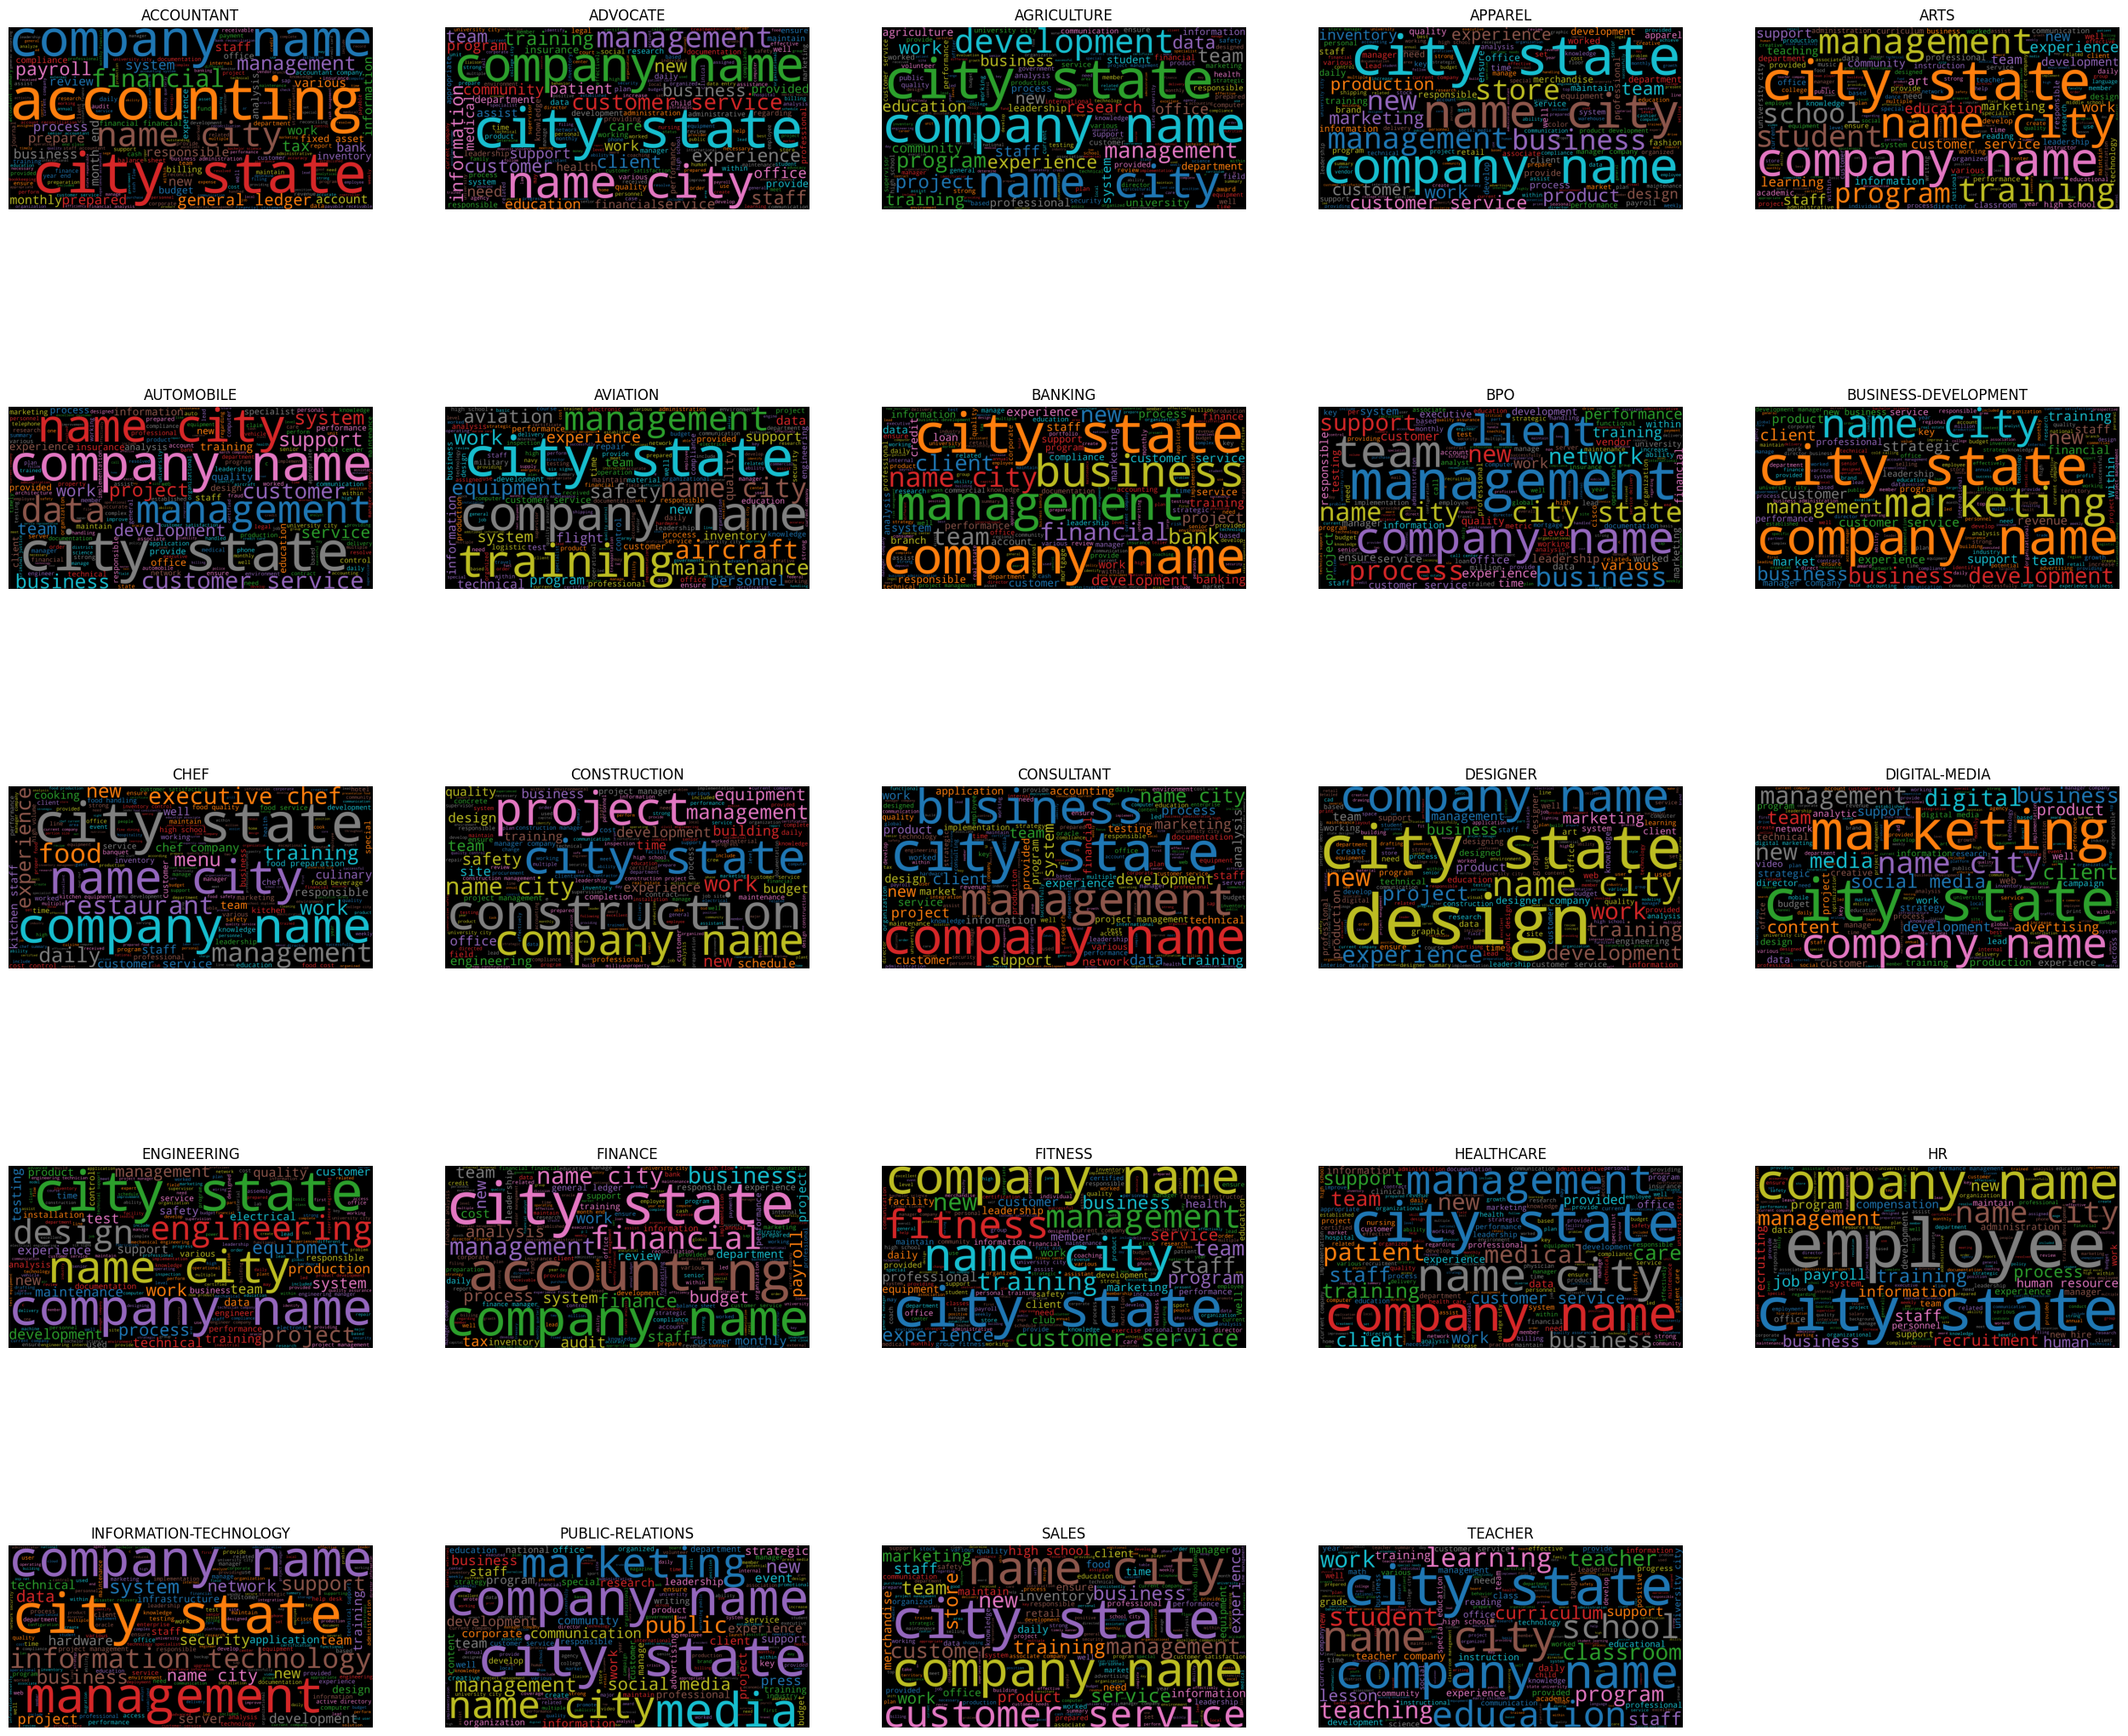

Processing CSV Files:  17%|█████████▊                                                 | 1/6 [13:21<1:06:46, 801.27s/it]

Completed WordCloud for Resume_processed_remove_numbers=False_use_dictionary=True_use_lemmatization=False_use_stemming=False.csv


Processing file: Resume_processed_remove_numbers=True_use_dictionary=False_use_lemmatization=False_use_stemming=False.csv


Processing CSV Files:  17%|█████████▊                                                 | 1/6 [14:40<1:13:21, 880.21s/it]


KeyboardInterrupt: 

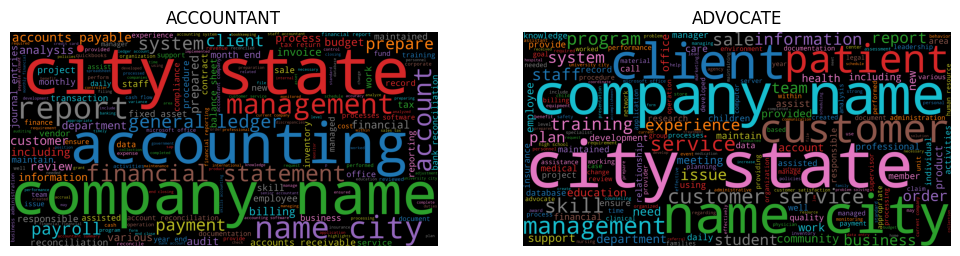

In [7]:
# Iterate over each CSV file and generate WordClouds
for file in tqdm(csv_files, desc="Processing CSV Files"):
    file_path = os.path.join(input_folder, file)
    
    # Load the dataset
    print(f"\nProcessing file: {file}")
    df = pd.read_csv(file_path)

    # Ensure required columns exist
    if 'Resume_str' not in df.columns or 'Category' not in df.columns:
        print(f"Skipping {file} - Required columns missing.")
        continue

    # Get unique job categories
    categories = np.sort(df['Category'].unique())

    # Create a list of DataFrames per category
    df_categories = [df[df['Category'] == category][['Resume_str', 'Category']] for category in categories]

    # Set figure size
    plt.figure(figsize=(32, 28))

    # Generate and display WordClouds for each category
    for i, category in enumerate(categories):
        wc = generate_wordcloud(df_categories[i])

        plt.subplot(5, 5, i + 1)
        plt.title(category)
        plt.imshow(wc)
        plt.axis('off')

    # Show the plot
    plt.show()
    plt.close()

    print(f"Completed WordCloud for {file}\n")